### Importing dependencies

In [16]:
import librosa
import os
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras import optimizers
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from keras import regularizers
from keras.models import Model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
from keras.utils import plot_model

### Extracting features from audio files

In [6]:
audio_file_paths=[]
audio_labels=[]
audio_data = '../Data/training/Speech_Data'
exp = os.listdir(audio_data)
for i in exp:
    files = os.listdir(audio_data+'/'+i)
    for j in files:
        audio_file_paths.append(audio_data+'/'+i+'/'+j)
        audio_labels.append(i)

In [7]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccsscaled = np.mean(mfccs.T,axis=0)
    return mfccsscaled

In [8]:
features = []
# Iterate through each sound file and extract the features 
for i in range(0,len(audio_file_paths)-1) :
    file_name = audio_file_paths[i]
    class_label = audio_labels[i]
    data = extract_features(file_name)
    features.append([data, class_label])
    
audio_df = pd.DataFrame(features, columns=['Audio_Features','Expression_Label'])

In [9]:
le = LabelEncoder()
y = le.fit_transform(audio_df.Expression_Label)
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'Angry': 0, 'Disgust': 1, 'Fearful': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprised': 6}


In [10]:
#aplitting data into train and test
X = np.array(audio_df.Audio_Features.tolist()).reshape(-1,40,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### Defining model arch

In [14]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, decay=0.0)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_4 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
activation_5 (Activation)    (None, 5, 128)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 128)           

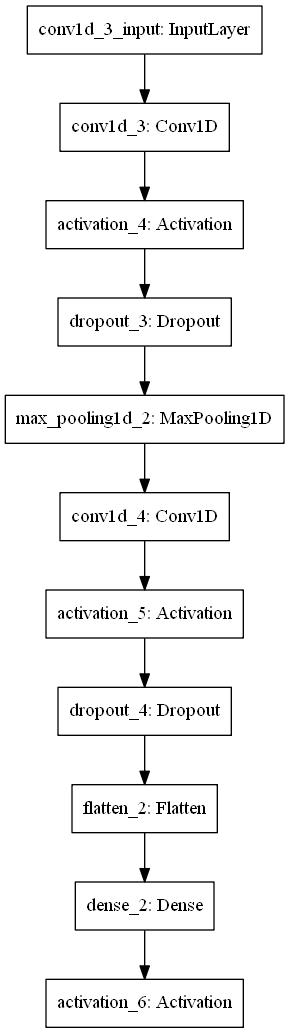

In [17]:
model.summary()
# plot model arch
plot_model(model, to_file='../Data/training/audio_network_arch.jpg')

### Fitting the model

In [18]:
hist = model.fit(x_train, y_train, batch_size=16, epochs=500, validation_data=(x_test, y_test))


Train on 2939 samples, validate on 1260 samples
Epoch 1/500
2939/2939 [==============================] - 3s 885us/step - loss: 5.7634 - accuracy: 0.1694 - val_loss: 2.4881 - val_accuracy: 0.2778
Epoch 2/500
2939/2939 [==============================] - 2s 681us/step - loss: 4.1268 - accuracy: 0.2593 - val_loss: 1.8792 - val_accuracy: 0.3786
Epoch 3/500
2939/2939 [==============================] - 2s 674us/step - loss: 3.1062 - accuracy: 0.3304 - val_loss: 1.8440 - val_accuracy: 0.4627
Epoch 4/500
2939/2939 [==============================] - 2s 635us/step - loss: 2.5535 - accuracy: 0.3855 - val_loss: 1.4559 - val_accuracy: 0.5381
Epoch 5/500
2939/2939 [==============================] - 2s 665us/step - loss: 2.0151 - accuracy: 0.4420 - val_loss: 1.3270 - val_accuracy: 0.5556
Epoch 6/500
2939/2939 [==============================] - 2s 657us/step - loss: 1.7273 - accuracy: 0.4784 - val_loss: 1.2095 - val_accuracy: 0.5825
Epoch 7/500
2939/2939 [==============================] - 2s 584us/ste

2939/2939 [==============================] - 1s 473us/step - loss: 0.5677 - accuracy: 0.7901 - val_loss: 0.6178 - val_accuracy: 0.7619
Epoch 110/500
2939/2939 [==============================] - 2s 525us/step - loss: 0.5737 - accuracy: 0.7887 - val_loss: 0.6100 - val_accuracy: 0.7619
Epoch 111/500
2939/2939 [==============================] - 1s 510us/step - loss: 0.5679 - accuracy: 0.7901 - val_loss: 0.6013 - val_accuracy: 0.7817
Epoch 112/500
2939/2939 [==============================] - 1s 493us/step - loss: 0.5711 - accuracy: 0.7822 - val_loss: 0.6168 - val_accuracy: 0.7611
Epoch 113/500
2939/2939 [==============================] - 2s 563us/step - loss: 0.5584 - accuracy: 0.7952 - val_loss: 0.6495 - val_accuracy: 0.7516
Epoch 114/500
2939/2939 [==============================] - 2s 515us/step - loss: 0.5566 - accuracy: 0.7901 - val_loss: 0.6019 - val_accuracy: 0.7746
Epoch 115/500
2939/2939 [==============================] - 2s 559us/step - loss: 0.5593 - accuracy: 0.7938 - val_loss: 0

2939/2939 [==============================] - 2s 533us/step - loss: 0.4771 - accuracy: 0.8176 - val_loss: 0.5553 - val_accuracy: 0.7937
Epoch 165/500
2939/2939 [==============================] - 2s 574us/step - loss: 0.4735 - accuracy: 0.8234 - val_loss: 0.5711 - val_accuracy: 0.7937
Epoch 166/500
2939/2939 [==============================] - 1s 476us/step - loss: 0.4694 - accuracy: 0.8258 - val_loss: 0.5707 - val_accuracy: 0.7897
Epoch 167/500
2939/2939 [==============================] - 2s 524us/step - loss: 0.4748 - accuracy: 0.8292 - val_loss: 0.5486 - val_accuracy: 0.7952
Epoch 168/500
2939/2939 [==============================] - 2s 560us/step - loss: 0.4621 - accuracy: 0.8295 - val_loss: 0.5415 - val_accuracy: 0.7976
Epoch 169/500
2939/2939 [==============================] - 1s 443us/step - loss: 0.4632 - accuracy: 0.8316 - val_loss: 0.5961 - val_accuracy: 0.7786
Epoch 170/500
2939/2939 [==============================] - 2s 531us/step - loss: 0.4643 - accuracy: 0.8272 - val_loss: 0

2939/2939 [==============================] - 2s 633us/step - loss: 0.3997 - accuracy: 0.8499 - val_loss: 0.5112 - val_accuracy: 0.8127
Epoch 220/500
2939/2939 [==============================] - 2s 662us/step - loss: 0.4033 - accuracy: 0.8496 - val_loss: 0.5101 - val_accuracy: 0.8159
Epoch 221/500
2939/2939 [==============================] - 2s 589us/step - loss: 0.4120 - accuracy: 0.8452 - val_loss: 0.5302 - val_accuracy: 0.8079
Epoch 222/500
2939/2939 [==============================] - 1s 499us/step - loss: 0.4162 - accuracy: 0.8421 - val_loss: 0.5244 - val_accuracy: 0.8095
Epoch 223/500
2939/2939 [==============================] - 2s 543us/step - loss: 0.3998 - accuracy: 0.8510 - val_loss: 0.5114 - val_accuracy: 0.8159
Epoch 224/500
2939/2939 [==============================] - 2s 592us/step - loss: 0.4168 - accuracy: 0.8442 - val_loss: 0.5449 - val_accuracy: 0.7905
Epoch 225/500
2939/2939 [==============================] - 2s 533us/step - loss: 0.4042 - accuracy: 0.8506 - val_loss: 0

2939/2939 [==============================] - 1s 468us/step - loss: 0.3593 - accuracy: 0.8748 - val_loss: 0.4978 - val_accuracy: 0.8183
Epoch 275/500
2939/2939 [==============================] - 2s 591us/step - loss: 0.3505 - accuracy: 0.8676 - val_loss: 0.4917 - val_accuracy: 0.8325
Epoch 276/500
2939/2939 [==============================] - 2s 565us/step - loss: 0.3600 - accuracy: 0.8700 - val_loss: 0.5022 - val_accuracy: 0.8119
Epoch 277/500
2939/2939 [==============================] - 1s 509us/step - loss: 0.3515 - accuracy: 0.8731 - val_loss: 0.5079 - val_accuracy: 0.8151
Epoch 278/500
2939/2939 [==============================] - 2s 525us/step - loss: 0.3560 - accuracy: 0.8741 - val_loss: 0.5071 - val_accuracy: 0.8119
Epoch 279/500
2939/2939 [==============================] - 2s 562us/step - loss: 0.3549 - accuracy: 0.8738 - val_loss: 0.4922 - val_accuracy: 0.8246
Epoch 280/500
2939/2939 [==============================] - 1s 479us/step - loss: 0.3589 - accuracy: 0.8690 - val_loss: 0

2939/2939 [==============================] - 2s 556us/step - loss: 0.3108 - accuracy: 0.8843 - val_loss: 0.4766 - val_accuracy: 0.8294
Epoch 330/500
2939/2939 [==============================] - 1s 477us/step - loss: 0.3183 - accuracy: 0.8881 - val_loss: 0.5081 - val_accuracy: 0.8143
Epoch 331/500
2939/2939 [==============================] - 2s 547us/step - loss: 0.3156 - accuracy: 0.8881 - val_loss: 0.5253 - val_accuracy: 0.8151
Epoch 332/500
2939/2939 [==============================] - 2s 595us/step - loss: 0.3099 - accuracy: 0.8908 - val_loss: 0.4741 - val_accuracy: 0.8254
Epoch 333/500
2939/2939 [==============================] - 1s 482us/step - loss: 0.3133 - accuracy: 0.8867 - val_loss: 0.5000 - val_accuracy: 0.8270
Epoch 334/500
2939/2939 [==============================] - 2s 533us/step - loss: 0.3080 - accuracy: 0.8850 - val_loss: 0.4806 - val_accuracy: 0.8222
Epoch 335/500
2939/2939 [==============================] - 2s 570us/step - loss: 0.3095 - accuracy: 0.8823 - val_loss: 0

2939/2939 [==============================] - 2s 545us/step - loss: 0.2768 - accuracy: 0.9058 - val_loss: 0.4813 - val_accuracy: 0.8206
Epoch 385/500
2939/2939 [==============================] - 2s 533us/step - loss: 0.2907 - accuracy: 0.8935 - val_loss: 0.4991 - val_accuracy: 0.8151
Epoch 386/500
2939/2939 [==============================] - 2s 578us/step - loss: 0.2762 - accuracy: 0.8955 - val_loss: 0.4671 - val_accuracy: 0.8262
Epoch 387/500
2939/2939 [==============================] - 2s 535us/step - loss: 0.2843 - accuracy: 0.8996 - val_loss: 0.4566 - val_accuracy: 0.8341
Epoch 388/500
2939/2939 [==============================] - 2s 511us/step - loss: 0.2765 - accuracy: 0.8983 - val_loss: 0.4637 - val_accuracy: 0.8262
Epoch 389/500
2939/2939 [==============================] - 2s 552us/step - loss: 0.2743 - accuracy: 0.9000 - val_loss: 0.4658 - val_accuracy: 0.8294
Epoch 390/500
2939/2939 [==============================] - 2s 552us/step - loss: 0.2760 - accuracy: 0.9040 - val_loss: 0

Epoch 493/500
2939/2939 [==============================] - 2s 599us/step - loss: 0.2246 - accuracy: 0.9177 - val_loss: 0.4715 - val_accuracy: 0.8310
Epoch 494/500
2939/2939 [==============================] - 2s 636us/step - loss: 0.2169 - accuracy: 0.9258 - val_loss: 0.4614 - val_accuracy: 0.8437
Epoch 495/500
2939/2939 [==============================] - 2s 573us/step - loss: 0.2278 - accuracy: 0.9217 - val_loss: 0.4695 - val_accuracy: 0.8365
Epoch 496/500
2939/2939 [==============================] - 2s 602us/step - loss: 0.2172 - accuracy: 0.9231 - val_loss: 0.4641 - val_accuracy: 0.8389
Epoch 497/500
2939/2939 [==============================] - 2s 649us/step - loss: 0.2217 - accuracy: 0.9217 - val_loss: 0.4857 - val_accuracy: 0.8317
Epoch 498/500
2939/2939 [==============================] - 1s 509us/step - loss: 0.2236 - accuracy: 0.9217 - val_loss: 0.4906 - val_accuracy: 0.8270
Epoch 499/500
2939/2939 [==============================] - 2s 541us/step - loss: 0.2176 - accuracy: 0.9214

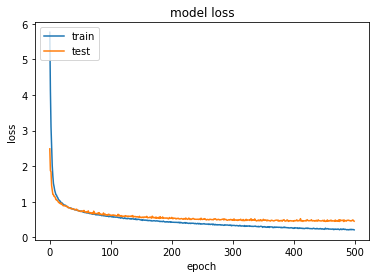

<Figure size 432x288 with 0 Axes>

In [19]:
#Plotting the loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('../Data/training/audio_network_loss.png')

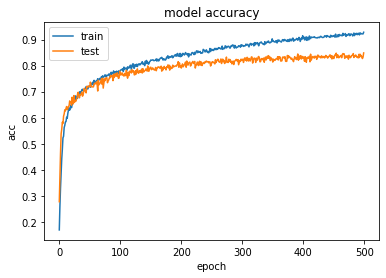

<Figure size 432x288 with 0 Axes>

In [22]:
#plotting the accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('../Data/training/audio_network_acc.png')

### Evaluating the model

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.4557581091684008
Test accuracy: 0.8484126925468445


In [24]:
model.save('../weights/audio_network.h5')

In [25]:
#loading the saved model
model = load_model('../weights/audio_network.h5')

In [26]:
pred = model.predict_classes(x_test, verbose=0)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       202
           1       0.83      0.93      0.88       180
           2       0.83      0.82      0.82       179
           3       0.80      0.86      0.83       177
           4       0.94      0.89      0.92       180
           5       0.73      0.76      0.75       160
           6       0.92      0.83      0.87       182

    accuracy                           0.85      1260
   macro avg       0.85      0.85      0.85      1260
weighted avg       0.85      0.85      0.85      1260



In [28]:
matrix = confusion_matrix(y_test,pred)
print (matrix)

[[169  10   5  11   0   4   3]
 [  2 167   1   6   1   0   3]
 [  5   2 147   6   2  15   2]
 [  4   3   6 152   0   8   4]
 [  0   4   0   3 161  12   0]
 [  3   6  15   8   4 122   2]
 [  6   8   4   5   3   5 151]]
